## Gráficos A.3

Ya con el Log llamado `log_central`, procedemos a crear los gráficos solicitados.

Primero, importamos las librerias necesarias para visualizar la información.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider

Ahora vamos a definir las columnas del Log. (nosotros sabemos cuales son, dado que salen en las intrucciones del PDF), pero debemos definirlas para el programa. (falta rango etario)

In [2]:
columnas_presentes = [
    "timestamp ini",
    "timestamp fin",
    "máquina",
    "tipo de máquina",
    "query búsqueda",
    "tiempo fin",
    "score obtenido",
    "rango etario"
]

vamos a leer el Log como un DataFrame en forma de CSV, aún cuando en realidad es un TXT.

In [3]:
df = pd.read_csv("log_central.txt", sep=",", names=columnas_presentes)

Mostramos las primeras 5 filas del data frame para visualizar de manera mas clara la información.

In [4]:
df.head()

,timestamp ini,timestamp fin,máquina,tipo de máquina,query búsqueda,tiempo fin,score obtenido,rango etario
0,2025-05-11T20:58:16.643897,2025-05-11T20:58:16.645551,3,video,posada errante,1.64,0,adulto
1,2025-05-11T20:58:16.650637,2025-05-11T20:58:16.651595,4,articulo,posada errante,0.96,0,adulto
2,2025-05-11T20:58:16.636366,2025-05-11T20:58:16.637359,2,tesis,posada errante,0.99,0,adulto
3,2025-05-11T20:58:16.630022,2025-05-11T20:58:16.631637,1,libro,posada errante,1.62,2,adulto
4,2025-05-11T21:00:20.019598,2025-05-11T21:00:20.021119,2,tesis,principito,1.50,0,joven


Ya con el data frame cargado correctamente, vamos a convertir las fechas de texto`timestamp ini` y `timestamp fin` a un formato adecuado para análisis y manipulación de fechas y horas en Python.

In [5]:
df["timestamp ini"] = pd.to_datetime(df["timestamp ini"])
df["timestamp fin"] = pd.to_datetime(df["timestamp fin"])

Ahora, visualizamos de nuevo las 5 primeras columnas, para verificar que todo ande bien.

In [6]:
df.head()

,timestamp ini,timestamp fin,máquina,tipo de máquina,query búsqueda,tiempo fin,score obtenido,rango etario
0,2025-05-11 20:58:16.643897,2025-05-11 20:58:16.645551,3,video,posada errante,1.64,0,adulto
1,2025-05-11 20:58:16.650637,2025-05-11 20:58:16.651595,4,articulo,posada errante,0.96,0,adulto
2,2025-05-11 20:58:16.636366,2025-05-11 20:58:16.637359,2,tesis,posada errante,0.99,0,adulto
3,2025-05-11 20:58:16.630022,2025-05-11 20:58:16.631637,1,libro,posada errante,1.62,2,adulto
4,2025-05-11 21:00:20.019598,2025-05-11 21:00:20.021119,2,tesis,principito,1.50,0,joven


## Ya con todo cargado, procedemos a presentar los gráficos solicitados.

### 1. Gráfico de torta con porcentaje de consulta por rango etario.

Para este gráfico, vamos a definir:

- Infante: 0 - 12 años  
- Joven: 13 - 25 años  
- Adulto: 26 - 120 años 

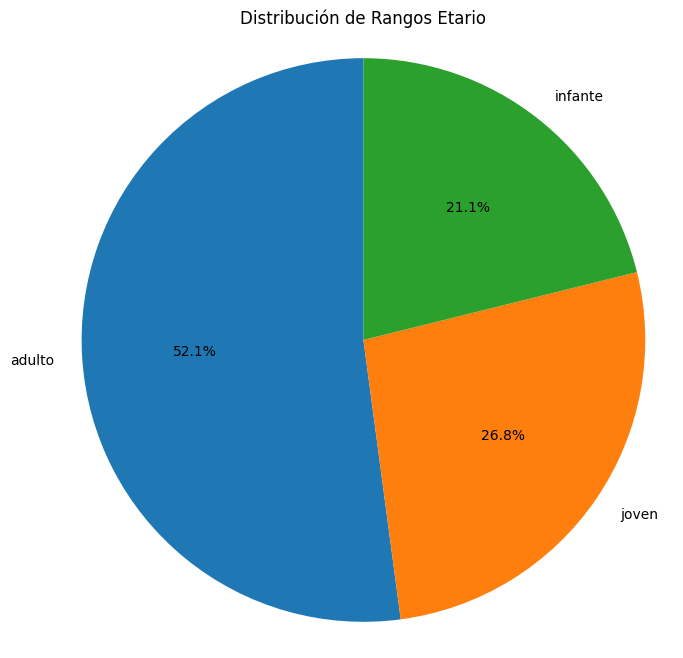

In [7]:
# Cambiar rango por la columna que falta de rango etario
conteo = df["rango etario"].value_counts()
etiquetas = conteo.index.tolist()
valores = conteo.values.tolist()

plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Rangos Etario')
plt.axis('equal')  # Para que el gráfico sea un círculo perfecto
plt.show()

### 2. Curvas de los promedios de score a través del tiempo, utilizar tamaños de ventana variable.

In [8]:
def plot_rolling_average(window_size):
    scores = df['score obtenido']
    time = df['timestamp ini']
    rolling_avg = scores.rolling(window=window_size).mean()

    plt.figure(figsize=(10, 6))
    plt.plot(time, rolling_avg, label=f'Promedio (ventana={window_size})', color='blue')
    plt.xlabel('Tiempo')
    plt.ylabel('Promedio de Score')
    plt.title('Promedio de Score a lo largo del tiempo')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Interfaz interactiva
interact(
    plot_rolling_average,
    window_size=IntSlider(min=1, max=50, step=1, value=10, description='Ventana')
)


interactive(children=(IntSlider(value=10, description='Ventana', max=50, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_rolling_average(window_size)>

### 3. Gráfico de cajas destacando los tiempos promedio, min, max por esclavo.

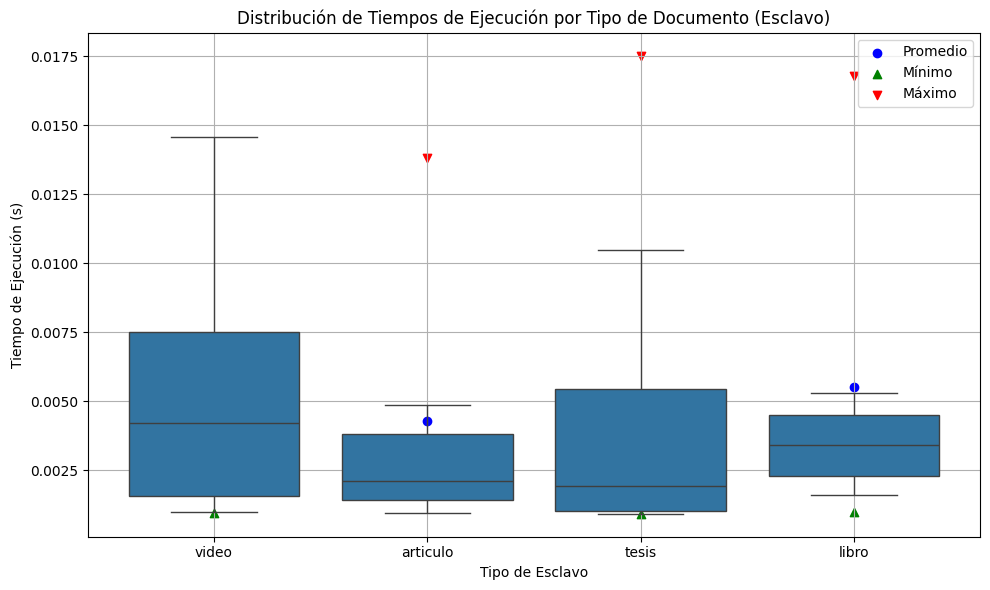

In [9]:
# Configurar figura
df['tiempo ejecucion'] = (df['timestamp fin'] - df['timestamp ini']).dt.total_seconds()

plt.figure(figsize=(10, 6))

# Boxplot usando Seaborn para mejor personalización
sns.boxplot(x='tipo de máquina', y='tiempo ejecucion', data=df, showfliers=False)

# Calcular estadísticas por esclavo (tipo_maquina)
stats = df.groupby('tipo de máquina')['tiempo ejecucion'].agg(['mean', 'min', 'max'])

# Dibujar puntos de min, max y promedio sobre cada grupo
for i, tipo in enumerate(stats.index):
    plt.scatter(i, stats.loc[tipo, 'mean'], color='blue', marker='o', label='Promedio' if i == 0 else "")
    plt.scatter(i, stats.loc[tipo, 'min'], color='green', marker='^', label='Mínimo' if i == 0 else "")
    plt.scatter(i, stats.loc[tipo, 'max'], color='red', marker='v', label='Máximo' if i == 0 else "")

# Títulos y etiquetas
plt.title('Distribución de Tiempos de Ejecución por Tipo de Documento (Esclavo)')
plt.xlabel('Tipo de Esclavo')
plt.ylabel('Tiempo de Ejecución (s)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 4. Latencia de red entre el maestro y los esclavos

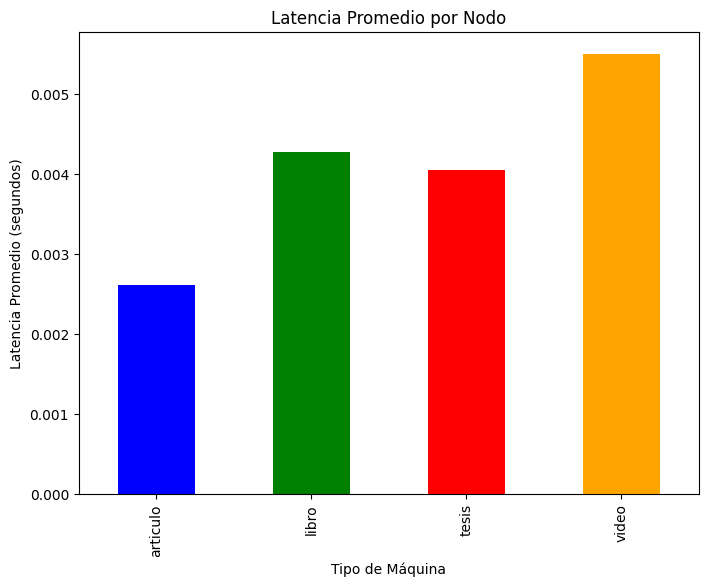

In [10]:
# Calcular latencia
df['latencia'] = (pd.to_datetime(df['timestamp fin']) - pd.to_datetime(df['timestamp ini'])).dt.total_seconds()

# Agrupar por tipo de máquina (maestro, esclavo) y calcular latencia promedio
latency = df.groupby('tipo de máquina')['latencia'].mean()

# Graficar latencia
plt.figure(figsize=(8, 6))
latency.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.title('Latencia Promedio por Nodo')
plt.xlabel('Tipo de Máquina')
plt.ylabel('Latencia Promedio (segundos)')
plt.show()

### Pregunta 5: Tamaño en MB de las respuestas por hora a través del día, indicando el día.

El 1e-7 que aparece en la parte superior del eje Y significa que todas las unidades del eje Y están multiplicadas por $10^{-7}$

Es porque el tamaño está en bytes y luego fue convertido a MB dividiendo por 1024² = 1,048,576, resultando en valores muy pequeños.


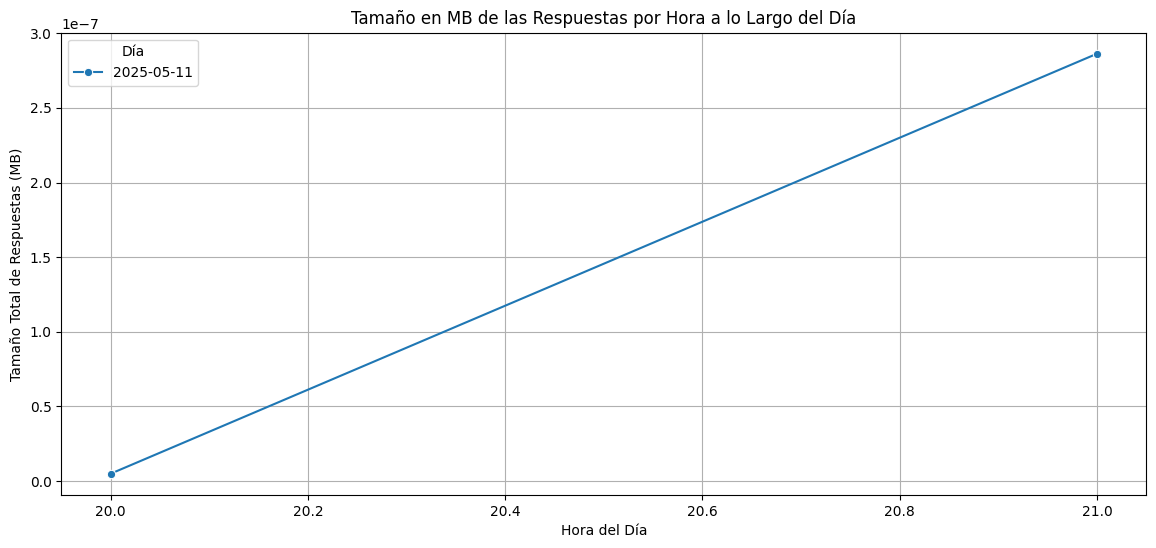

In [11]:
# Extrae hora y fecha
df['hora'] = df['timestamp fin'].dt.hour
df['dia'] = df['timestamp fin'].dt.date

# Asegura que el tamaño esté en MB
df['tamano_MB'] = df['tiempo ejecucion'] / (1024 * 1024)

# Agrupa por día y hora
tamano_por_hora = df.groupby(['dia', 'hora'])['tamano_MB'].sum().reset_index()

# Grafica
plt.figure(figsize=(14, 6))
sns.lineplot(data=tamano_por_hora, x='hora', y='tamano_MB', hue='dia', marker='o')
plt.title('Tamaño en MB de las Respuestas por Hora a lo Largo del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Tamaño Total de Respuestas (MB)')
plt.grid(True)
plt.legend(title='Día')
plt.show()
